In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:\\Users\\omkarp\\OneDrive - Chalmers\\KTH research\Old\\')
dff = pd.read_excel('Vandal.xlsx')
dff['count']=1
dff['Date'] = pd.to_datetime(dff['BROTTSDA_1'])
dff = dff.drop(columns = ["OBJECTID","BROTTSDA_1"])
dff = dff.sort_values(by='Date',ascending=True)
dff = dff.reset_index(drop=True)
dff = dff.groupby('Date').sum('count')
dff = dff.reset_index(drop=False)
dff.head()

,Date,count
0,1899-12-30,3
1,1974-03-01,1
2,1981-01-01,1
3,1984-01-01,1
4,1985-01-01,1


In [3]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1345 non-null   datetime64[ns]
 1   count   1345 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 21.1 KB


In [4]:
os.chdir('C:\\Users\\omkarp\\OneDrive - Chalmers\\KTH research\Old\\')
dff1 = pd.read_excel('A192.700 2023.xlsx')
dff1 = dff1.dropna(axis = 0, how = 'all')
dff1 = dff1[pd.notnull(dff1['Brottskoder'])]
dff1 = dff1.drop(['Brottskoder'], axis=1)
dff1.rename(columns={'Brottsdatum beräknat': 'Date', 'Anmälda brott': 'count'},inplace=True, errors='raise')
dff1 = dff1[pd.notnull(dff1['count'])]
dff1 = dff1.groupby('Date').sum('count')
dff1 = dff1.reset_index(drop=False)
dff1.head()

,Date,count
0,2021-01-01,128.0
1,2021-01-02,119.0
2,2021-01-03,168.0
3,2021-01-04,285.0
4,2021-01-05,180.0


In [5]:
dff1.tail()

,Date,count
176,2021-06-26,156.0
177,2021-06-27,263.0
178,2021-06-28,258.0
179,2021-06-29,223.0
180,2021-06-30,316.0


In [6]:
dff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    181 non-null    datetime64[ns]
 1   count   181 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [7]:
dff2 = pd.concat([dff, dff1])
dff2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 0 to 180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1526 non-null   datetime64[ns]
 1   count   1526 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.8 KB


In [8]:
dff2 = dff2.sort_values(by='Date').reset_index(drop=True)
dff2.head()

,Date,count
0,1899-12-30,3.0
1,1974-03-01,1.0
2,1981-01-01,1.0
3,1984-01-01,1.0
4,1985-01-01,1.0


In [9]:
dff=dff2
dff = dff.query('"2019-01-01" <= Date < "2021-06-05"')
dff['Van_per'] = (dff['count'] / dff['count'].sum()) * 100
dff = dff.set_index('Date')
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 886 entries, 2019-01-01 to 2021-06-04
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   count    886 non-null    float64
 1   Van_per  886 non-null    float64
dtypes: float64(2)
memory usage: 20.8 KB


In [10]:
dff.head()

,count,Van_per
Date,,
2019-01-01,182.0,0.117624
2019-01-02,67.0,0.043301
2019-01-03,72.0,0.046533
2019-01-04,108.0,0.069799
2019-01-05,85.0,0.054934


In [11]:
os.chdir('C:\\Users\\omkarp\\OneDrive - Chalmers\\KTH research\Old\\')
df = pd.read_excel('data_rev.xlsx')
df.rename(columns={'Urine_per':'Uri_per','Litter_per':'Litt_per','Grafitti_per':'Graf_per','AbanCars_per':'Aban_per','BikePark_per':'Bike_per'}, inplace=True)
# df = df.set_index('Date')
df.head()

,Date,Urine,Uri_per,Litter,Litt_per,Grafitti,Graf_per,AbanCars,Aban_per,BikePark,Bike_per,Total
0,2019-01-01,1,0.000266,21,0.000495,20,0.000307,0,0.000000,1,0.000431,43
1,2019-01-02,2,0.000532,28,0.000660,23,0.000353,1,0.000602,0,0.000000,54
2,2019-01-03,1,0.000266,11,0.000259,29,0.000445,1,0.000602,2,0.000862,44
3,2019-01-04,2,0.000532,19,0.000448,29,0.000445,0,0.000000,1,0.000431,51
4,2019-01-05,1,0.000266,17,0.000401,36,0.000553,1,0.000602,0,0.000000,55


In [12]:
df = df.query('"2019-01-01" <= Date < "2021-06-05"')
df1=df['Date'].to_frame() 
df1 = df1.set_index('Date')
df1.head()

""
Date
2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05


In [13]:
df['Uri_per'] = (df['Urine'] / df['Urine'].sum()) * 100
df['Litt_per'] = (df['Litter'] / df['Litter'].sum()) * 100
df['Graf_per'] = (df['Grafitti'] / df['Grafitti'].sum()) * 100
df['Aban_per'] = (df['AbanCars'] / df['AbanCars'].sum()) * 100
df['Bike_per'] = (df['BikePark'] / df['BikePark'].sum()) * 100
df = df.set_index('Date')
df.head()

,Urine,Uri_per,Litter,Litt_per,Grafitti,Graf_per,AbanCars,Aban_per,BikePark,Bike_per,Total
Date,,,,,,,,,,,
2019-01-01,1,0.033852,21,0.063425,20,0.042037,0,0.000000,1,0.055804,43
2019-01-02,2,0.067705,28,0.084567,23,0.048343,1,0.074963,0,0.000000,54
2019-01-03,1,0.033852,11,0.033223,29,0.060954,1,0.074963,2,0.111607,44
2019-01-04,2,0.067705,19,0.057384,29,0.060954,0,0.000000,1,0.055804,51
2019-01-05,1,0.033852,17,0.051344,36,0.075667,1,0.074963,0,0.000000,55


In [14]:
df['Vandalism']= dff['count']
df['Van_per']= dff['Van_per']
df.head()

,Urine,Uri_per,Litter,Litt_per,Grafitti,Graf_per,AbanCars,Aban_per,BikePark,Bike_per,Total,Vandalism,Van_per
Date,,,,,,,,,,,,,
2019-01-01,1,0.033852,21,0.063425,20,0.042037,0,0.000000,1,0.055804,43,182.0,0.117624
2019-01-02,2,0.067705,28,0.084567,23,0.048343,1,0.074963,0,0.000000,54,67.0,0.043301
2019-01-03,1,0.033852,11,0.033223,29,0.060954,1,0.074963,2,0.111607,44,72.0,0.046533
2019-01-04,2,0.067705,19,0.057384,29,0.060954,0,0.000000,1,0.055804,51,108.0,0.069799
2019-01-05,1,0.033852,17,0.051344,36,0.075667,1,0.074963,0,0.000000,55,85.0,0.054934


In [15]:
os.chdir('C:\\Users\\omkarp\\OneDrive - Chalmers\\KTH research\Old\\')
df.to_excel('Infractions_new.xlsx', index=True)

In [16]:
# Convert to percent values
df1['Uri_per'] =df.Uri_per.mul(100).to_frame() 
df1['Graf_per'] =df.Graf_per.mul(100).to_frame() 
df1['Litt_per'] =df.Litt_per.mul(100).to_frame() 
df1['Aban_per'] =df.Aban_per.mul(100).to_frame() 
df1['Bike_per'] =df.Bike_per.mul(100).to_frame() 
df1['Van_per'] =dff.Van_per.mul(100).to_frame() 
df1.head()

,Uri_per,Graf_per,Litt_per,Aban_per,Bike_per,Van_per
Date,,,,,,
2019-01-01,3.385240,4.203712,6.342495,0.000000,5.580357,11.762425
2019-01-02,6.770481,4.834269,8.456660,7.496252,0.000000,4.330123
2019-01-03,3.385240,6.095382,3.322259,7.496252,11.160714,4.653267
2019-01-04,6.770481,6.095382,5.738448,0.000000,5.580357,6.979900
2019-01-05,3.385240,7.566681,5.134400,7.496252,0.000000,5.493440


In [17]:
df1.tail()

,Uri_per,Graf_per,Litt_per,Aban_per,Bike_per,Van_per
Date,,,,,,
2021-03-21,0.0,7.566681,18.423437,22.488756,0.000000,12.408712
2021-04-04,0.0,17.655590,11.778919,7.496252,22.321429,13.572029
2021-04-06,0.0,20.598188,15.403201,0.000000,11.160714,20.487300
2021-04-14,0.0,36.151922,14.799154,7.496252,27.901786,16.609578
2021-04-25,0.0,21.438931,11.476895,7.496252,5.580357,12.667227


In [18]:
df1 = df1.fillna(0)
df1

,Uri_per,Graf_per,Litt_per,Aban_per,Bike_per,Van_per
Date,,,,,,
2019-01-01,3.385240,4.203712,6.342495,0.000000,5.580357,11.762425
2019-01-02,6.770481,4.834269,8.456660,7.496252,0.000000,4.330123
2019-01-03,3.385240,6.095382,3.322259,7.496252,11.160714,4.653267
2019-01-04,6.770481,6.095382,5.738448,0.000000,5.580357,6.979900
2019-01-05,3.385240,7.566681,5.134400,7.496252,0.000000,5.493440
...,...,...,...,...,...,...
2021-03-21,0.000000,7.566681,18.423437,22.488756,0.000000,12.408712
2021-04-04,0.000000,17.655590,11.778919,7.496252,22.321429,13.572029
2021-04-06,0.000000,20.598188,15.403201,0.000000,11.160714,20.487300


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 884 entries, 2019-01-01 to 2021-04-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Uri_per   884 non-null    float64
 1   Graf_per  884 non-null    float64
 2   Litt_per  884 non-null    float64
 3   Aban_per  884 non-null    float64
 4   Bike_per  884 non-null    float64
 5   Van_per   884 non-null    float64
dtypes: float64(6)
memory usage: 48.3 KB


In [20]:
df1 = df1.reset_index(drop=False)
df1 = df1.sort_values(by='Date',ascending=True)
df1.head()

,Date,Uri_per,Graf_per,Litt_per,Aban_per,Bike_per,Van_per
0,2019-01-01,3.385240,4.203712,6.342495,0.000000,5.580357,11.762425
1,2019-01-02,6.770481,4.834269,8.456660,7.496252,0.000000,4.330123
2,2019-01-03,3.385240,6.095382,3.322259,7.496252,11.160714,4.653267
3,2019-01-04,6.770481,6.095382,5.738448,0.000000,5.580357,6.979900
4,2019-01-05,3.385240,7.566681,5.134400,7.496252,0.000000,5.493440


In [21]:
df1.tail()

,Date,Uri_per,Graf_per,Litt_per,Aban_per,Bike_per,Van_per
782,2021-05-31,23.696682,35.521365,45.605557,14.992504,16.741071,24.429652
783,2021-06-01,30.467163,19.967631,25.369979,22.488756,11.160714,19.259355
784,2021-06-02,10.155721,15.553734,25.067955,14.992504,5.580357,19.323984
785,2021-06-03,6.770481,21.649116,34.732709,7.496252,0.000000,21.585988
786,2021-06-04,3.385240,11.980579,26.578073,0.000000,16.741071,15.575519


In [22]:
df1['Dated'] = pd.to_datetime(df1['Date'])
df1['Date']=df1['Date'].apply(mpl_dates.date2num)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 786
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      884 non-null    float64       
 1   Uri_per   884 non-null    float64       
 2   Graf_per  884 non-null    float64       
 3   Litt_per  884 non-null    float64       
 4   Aban_per  884 non-null    float64       
 5   Bike_per  884 non-null    float64       
 6   Van_per   884 non-null    float64       
 7   Dated     884 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 62.2 KB


In [23]:
df1.head()

,Date,Uri_per,Graf_per,Litt_per,Aban_per,Bike_per,Van_per,Dated
0,17897.0,3.385240,4.203712,6.342495,0.000000,5.580357,11.762425,2019-01-01
1,17898.0,6.770481,4.834269,8.456660,7.496252,0.000000,4.330123,2019-01-02
2,17899.0,3.385240,6.095382,3.322259,7.496252,11.160714,4.653267,2019-01-03
3,17900.0,6.770481,6.095382,5.738448,0.000000,5.580357,6.979900,2019-01-04
4,17901.0,3.385240,7.566681,5.134400,7.496252,0.000000,5.493440,2019-01-05


In [24]:
df=df1

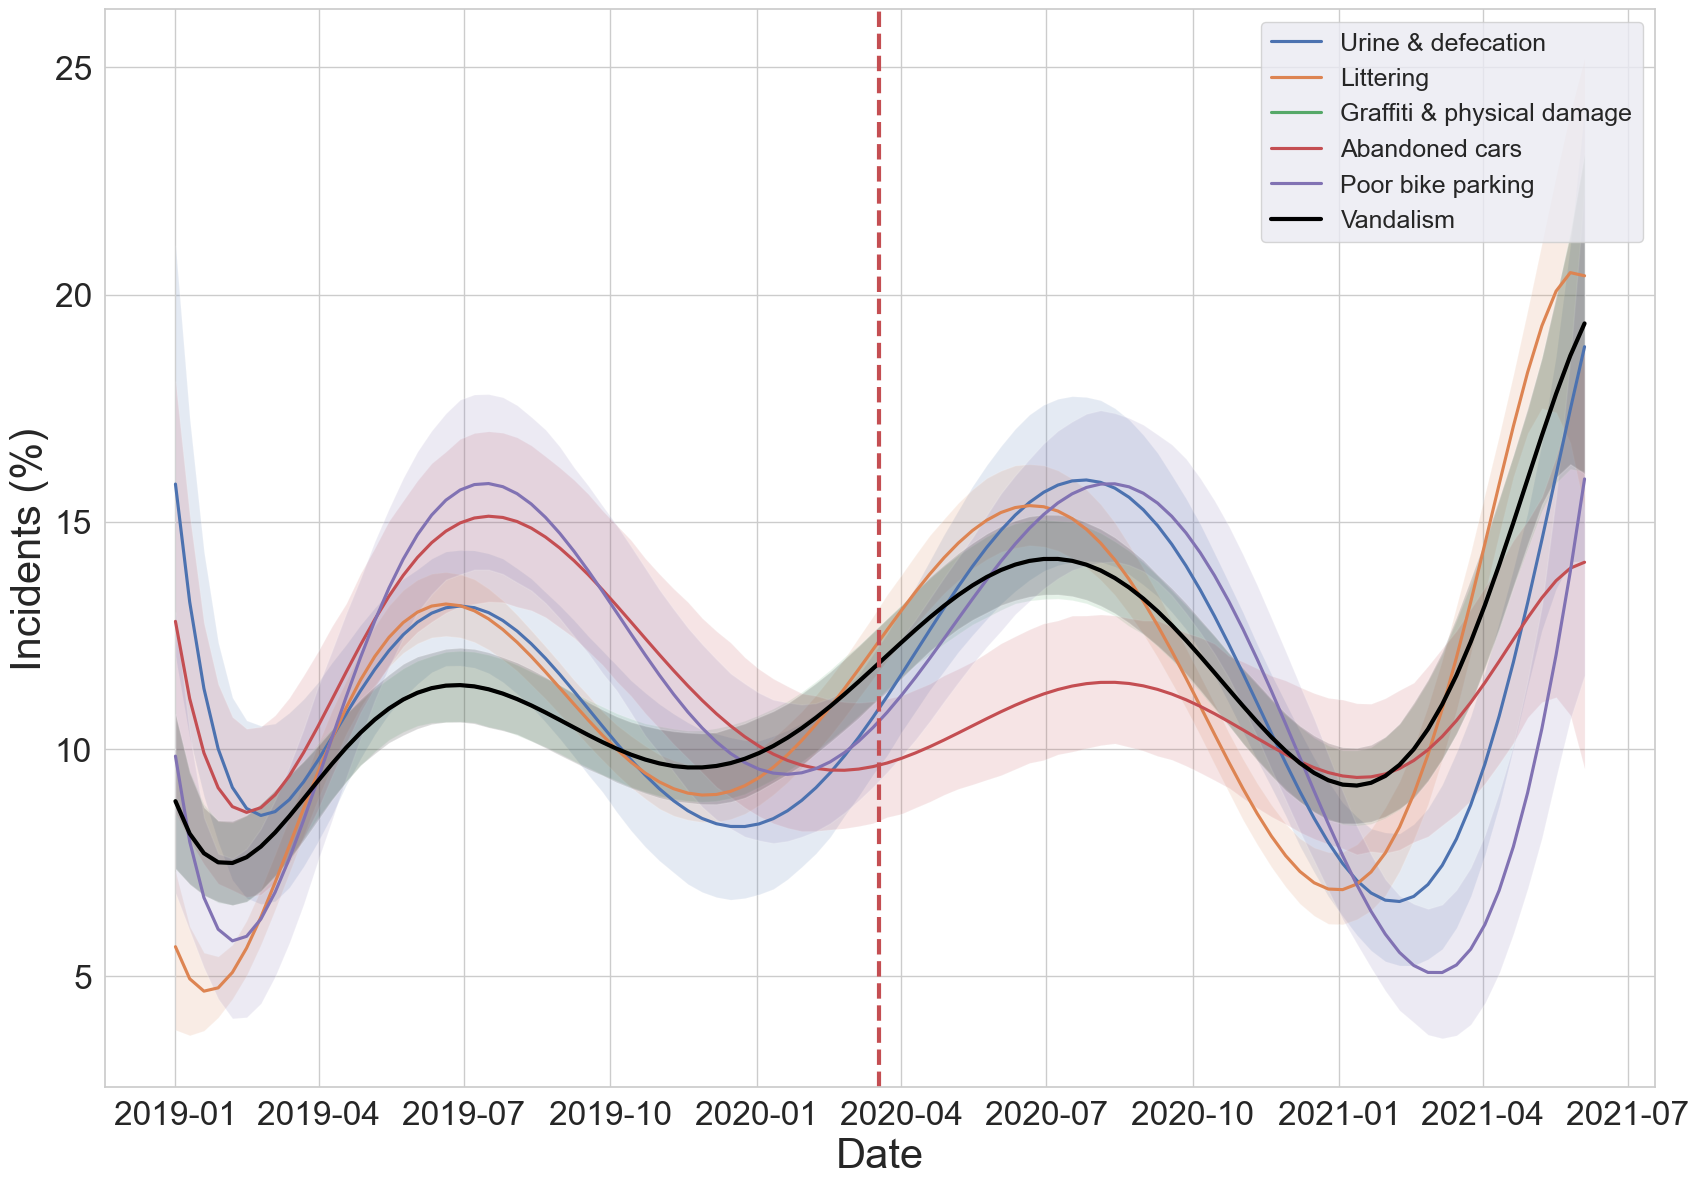

In [26]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(20, 14))
x=df['Date']
m=df['Uri_per']
n=df['Litt_per']
y=df['Graf_per']
q=df['Aban_per']
r=df['Bike_per']
l=df['Van_per']

Urine = sns.regplot(x=x, y=m, order=20, label="Urine & defecation",scatter=False)
Litter = sns.regplot(x=x,y=n, order=20, label="Littering",scatter=False)
Grafitti = sns.regplot(x=x,y=y, order=20, label="Graffiti & physical damage",scatter=False)
AbanCars = sns.regplot(x=x,y=q, order=20, label="Abandoned cars",scatter=False)
BikePark = sns.regplot(x=x,y=r, order=20, label="Poor bike parking",scatter=False)          
Vandals = sns.regplot(x=x, y=y, order=20, scatter=False, line_kws={"linewidth": 3, "color": "black"}, label="Vandalism", ax=ax)
sns.set(font_scale = 2.2)

#plt.title("Comparative (%) TimeSeries_Categories")
ax.axvline(pd.to_datetime('2020-03-18'), color='r', linestyle='--', lw=3)
ax.set_xlabel("Date", fontsize=30)  # set x label
ax.set_ylabel("Incidents (%)", fontsize=30)  # set y label

plt.legend(fontsize = 18)
os.chdir('C:\\Users\\omkarp\\OneDrive - Chalmers\\KTH research\Old\\')
plt.savefig('SeasonalVariation_plot.png')
plt.show()